In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from glob import glob
import seaborn as sns
sns.set()

import sklearn
import skimage
from skimage.transform import resize

import random
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [2]:
train = "../input/wildfire-detection-image-data/forest_fire/Training and Validation"

test = "../input/wildfire-detection-image-data/forest_fire/Testing"



LOAD_FROM_IMAGES = True

def get_data(folder):
    x = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith("."):
            if folderName in ["nofire"]:
                label = 0
            elif folderName in ["fire"]:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder +"/" +folderName+"/")):
                img_file = cv2.imread(folder + "/" +folderName + "/" + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file,(128,128,3), mode = "constant",anti_aliasing=True)
                    #img_file = rgb2gray(img_file)
                    img_arr = np.asarray(img_file)
                    x.append(img_arr)
                    y.append(label)
    x = np.asarray(x)
    y = np.asarray(y)
    return x,y

if LOAD_FROM_IMAGES:
    X_train,y_train = get_data(train)
    X_test, y_test = get_data(test)
    
    np.save("xtrain.npy",X_train)
    np.save("ytrain.npy",y_train)
    np.save("xtest.npy",X_test)
    np.save("ytest.npy",y_test)
else:
    X_train = np.load("xtrain.npy")
    y_train = np.load("ytrain.npy")
    X_test = np.load("xtest.npy")
    y_test = np.load("ytest.npy")

100%|██████████| 22/22 [00:00<00:00, 74.31it/s]


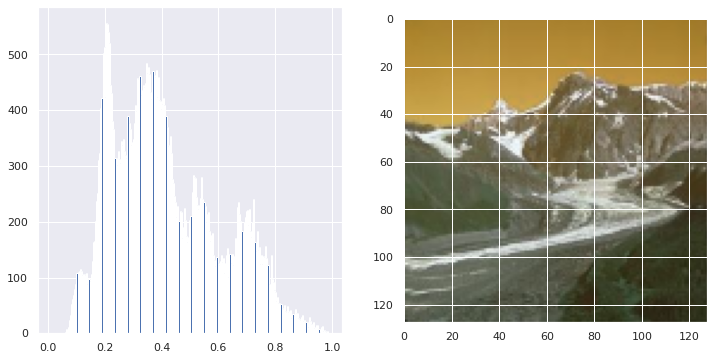

In [3]:
def plot_histogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.hist(a.ravel(),bins=255)
    plt.subplot(1,2,2)
    plt.imshow(a,vmin=0,vmax=1)
    plt.show()
    
    
plot_histogram(X_train[1])

# No Fire

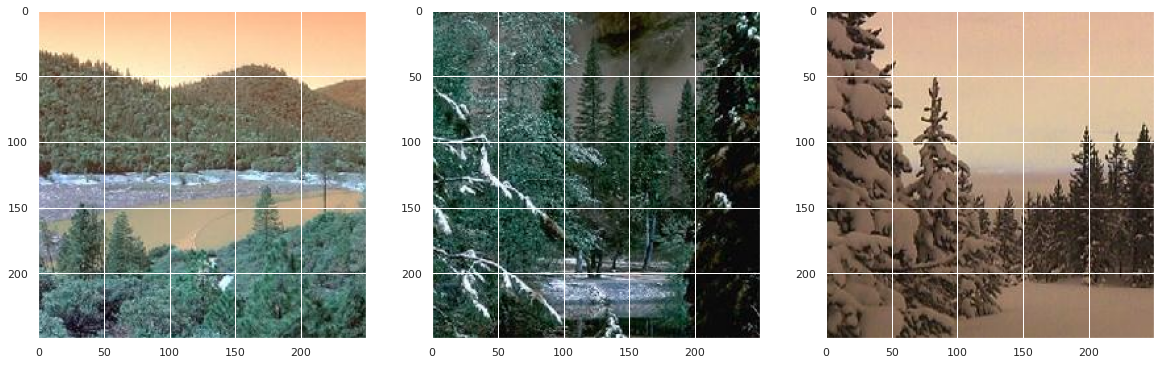

In [4]:
glob_img = glob("../input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/**")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)

No Fire


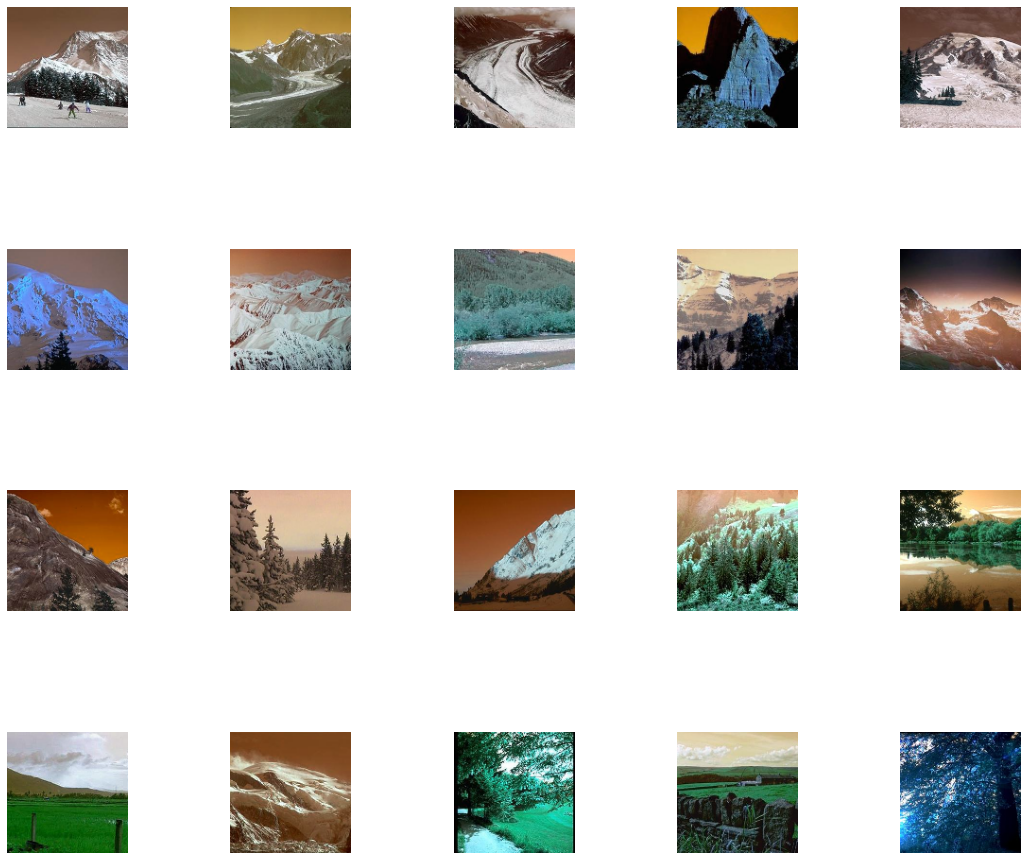

In [5]:
print("No Fire")

glob_img = glob("../input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/**")
i_=0
plt.rcParams["figure.figsize"] =(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=1)
for i in  glob_img[0:20]:
    img=cv2.imread(i)
    img=cv2.resize(img,(128,128))
    plt.subplot(5,5,i_+1)
    plt.imshow(img);plt.axis("off")
    i_ +=1

# Fire

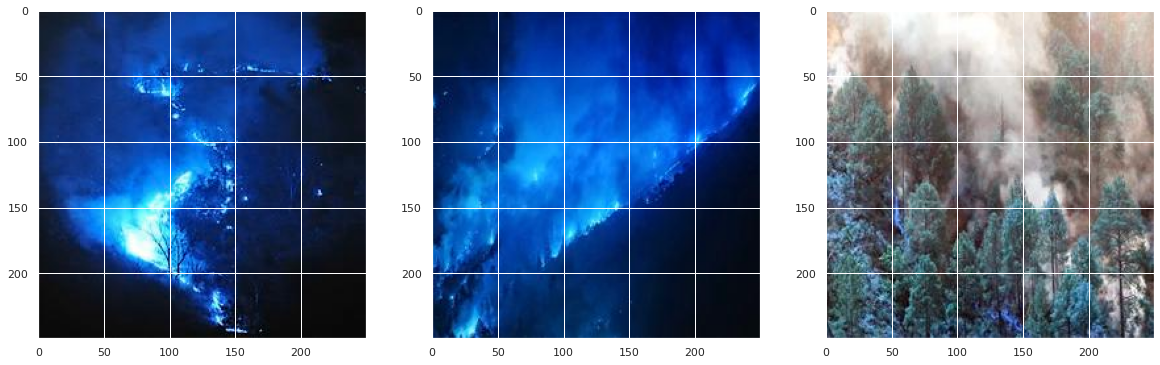

In [6]:
glob_img = glob("../input/wildfire-detection-image-data/forest_fire/Training and Validation/fire/**")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)

Fire


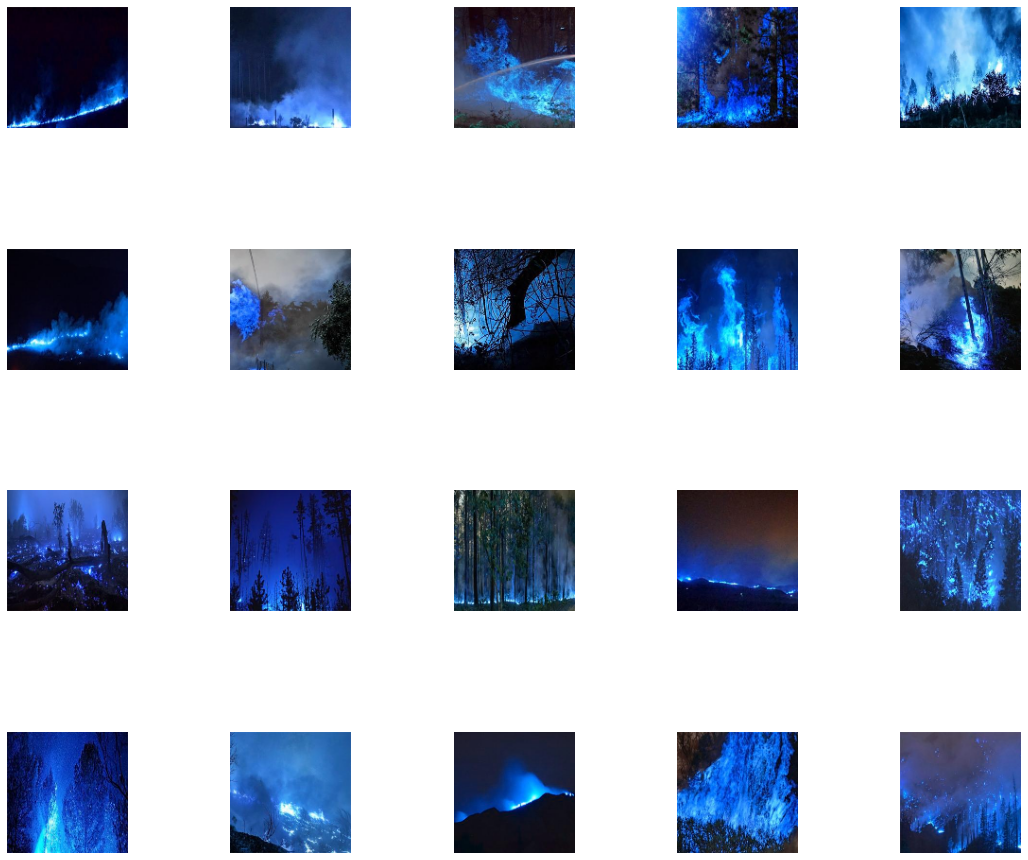

In [7]:
print("Fire")

glob_img = glob("../input/wildfire-detection-image-data/forest_fire/Training and Validation/fire/**")
i_=0
plt.rcParams["figure.figsize"] =(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=1)
for i in  glob_img[0:20]:
    img=cv2.imread(i)
    img=cv2.resize(img,(128,128))
    plt.subplot(5,5,i_+1)
    plt.imshow(img);plt.axis("off")
    i_ +=1

{0: 'No_Fire', 1: 'Fire'}


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


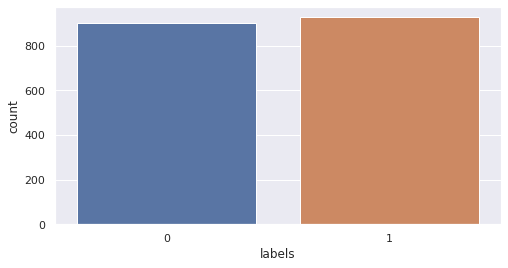

In [8]:
plt.figure(figsize=(8,4))

map_characters = {0:"No_Fire",1:"Fire"}
dict_characters = map_characters

df = pd.DataFrame()
df["labels"]=y_train
lab = df["labels"]
dist=lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [9]:
X_train.shape

(1832, 128, 128, 3)

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(2,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [12]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
batch_size=8
epochs=150

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='accuracy', 
    patience=80,
    restore_best_weights=True
)

In [15]:
history =  model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,
                              verbose=1,
                              validation_data =(X_test,y_test),callbacks=[custom_early_stopping])

Epoch 1/150
229/229 [==============================] - 10s 20ms/step - loss: 0.3870 - accuracy: 0.8461 - val_loss: 0.5487 - val_accuracy: 0.8676
Epoch 2/150
229/229 [==============================] - 4s 19ms/step - loss: 0.2964 - accuracy: 0.8627 - val_loss: 0.3785 - val_accuracy: 0.8235
Epoch 3/150
229/229 [==============================] - 4s 18ms/step - loss: 0.2021 - accuracy: 0.9263 - val_loss: 0.2576 - val_accuracy: 0.9265
Epoch 4/150
229/229 [==============================] - 4s 18ms/step - loss: 0.2189 - accuracy: 0.9128 - val_loss: 0.1865 - val_accuracy: 0.9118
Epoch 5/150
229/229 [==============================] - 4s 18ms/step - loss: 0.1744 - accuracy: 0.9415 - val_loss: 0.3135 - val_accuracy: 0.8529
Epoch 6/150
229/229 [==============================] - 4s 18ms/step - loss: 0.2227 - accuracy: 0.9168 - val_loss: 0.2130 - val_accuracy: 0.9265
Epoch 7/150
229/229 [==============================] - 4s 18ms/step - loss: 0.2086 - accuracy: 0.9160 - val_loss: 0.1901 - val_accuracy

In [16]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 0s 15ms/step - loss: 0.2362 - accuracy: 0.9412
Test loss: 0.23619814217090607
Test accuracy: 0.9411764740943909


In [17]:
y_test_pred = model.predict(X_test)

In [18]:
y_pred = (y_test_pred > 0.5)
y_pred=np.argmax(y_pred, axis=1)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
y_pred.shape

(68,)

In [21]:
y_test.shape

(68,)

In [22]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.68      0.86      0.76        22

    accuracy                           0.82        68
   macro avg       0.80      0.83      0.81        68
weighted avg       0.85      0.82      0.83        68



In [23]:
def confusion(y_test,y_test_pred,X):
    names=['No Fire','Fire']
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

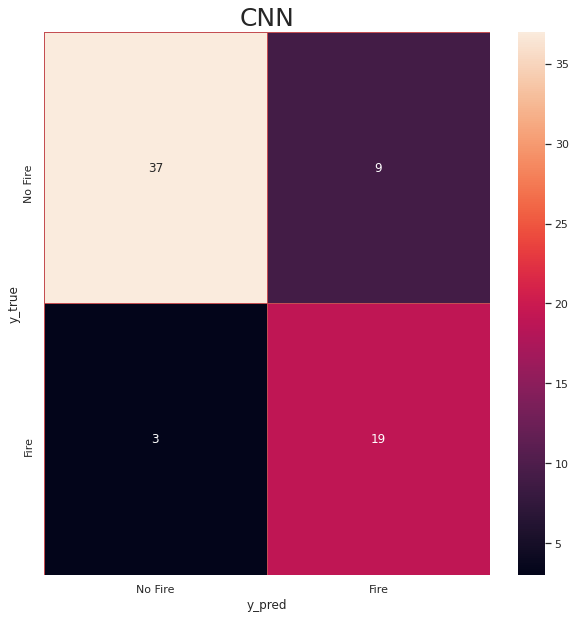

In [24]:
confusion(y_test,y_pred,"CNN")